# **Clustering customers into groups using ML for subsequent targeted marketing.**

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Loading csv data to dataframe

In [2]:
data=pd.read_csv('/content/Wholesale customers data.csv')

# Checking data - columns and null values

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Statistical data of the dataframe

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


# MinMax scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X=data
X=ms.fit_transform(X)

In [8]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


# **KMeans Clustering**

In [9]:
from sklearn.cluster import KMeans


In [11]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[186.89185814102913,
 85.11692833765338,
 41.73172344212006,
 26.542897831987602,
 21.746762042487152,
 17.66875555527636,
 15.11869218250009,
 12.821378336622953,
 11.144315491089486,
 10.149775820515586]

## Checking the best number of cluster by elbow method

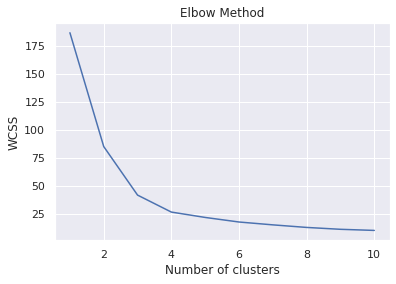

In [13]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Checking the best number of cluster by silhouette score

In [15]:
from sklearn.metrics import silhouette_score
s_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(X)
    score = silhouette_score(X,kmeans.labels_)
    s_coef.append(score)

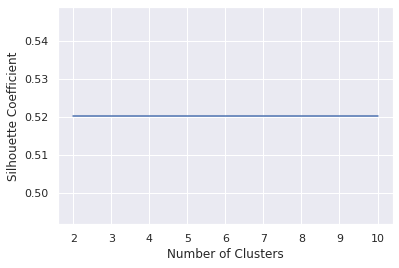

In [16]:
sns.set()
plt.plot(range(2, 11), s_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

silhouette_score is not changing with number of clusters, so taking cluster value as 3 (by elbow method)

In [18]:
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=9)
y_pred = kmeans.fit_predict(X)

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.6593155081294824

# **Agglomerative Clustering**

## plotting Dendogram

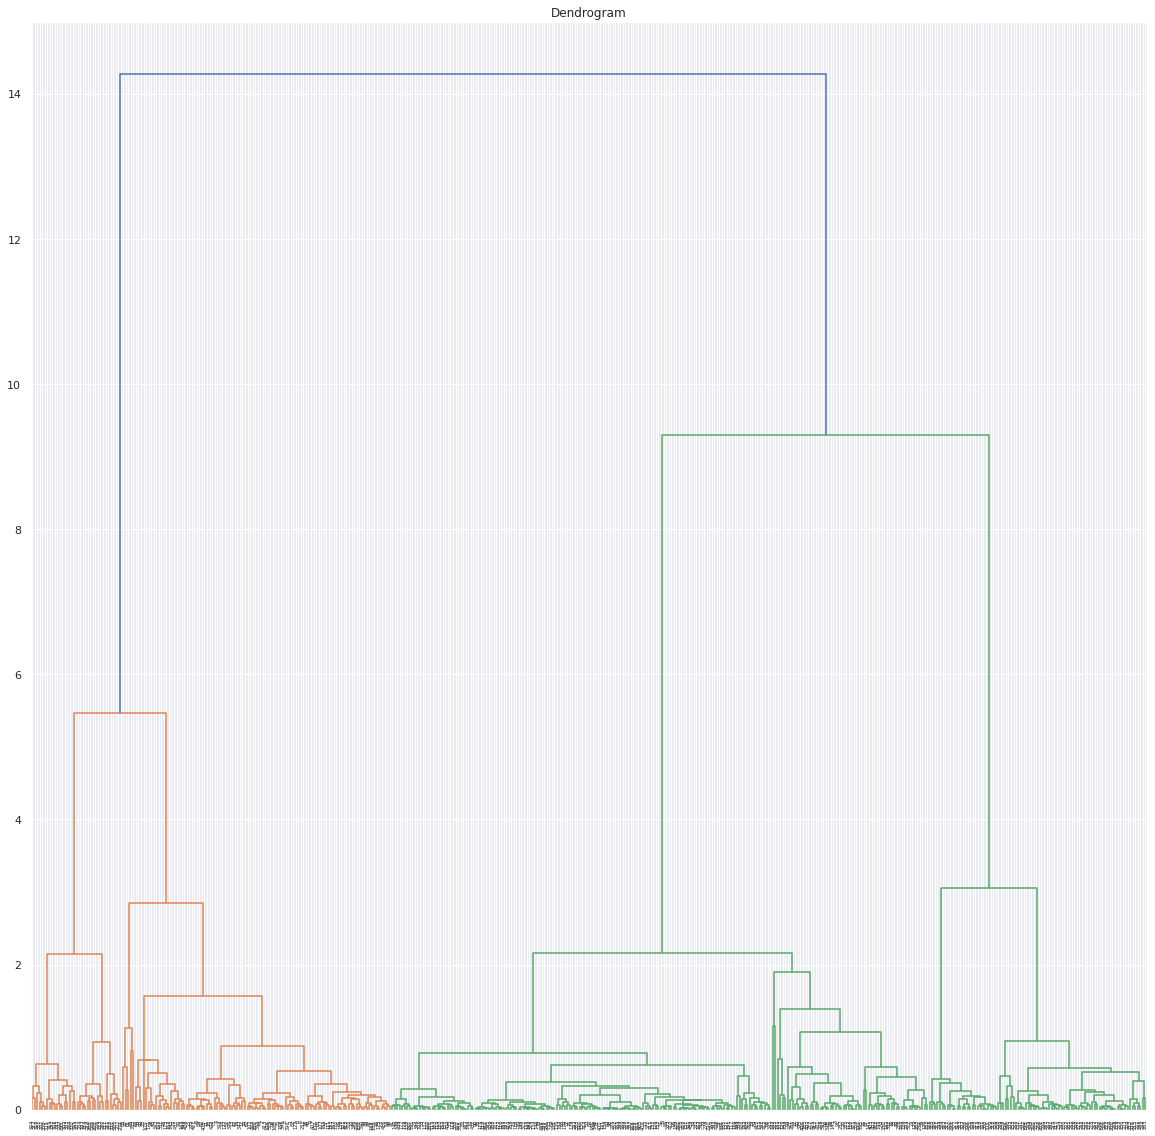

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,20))
plt.title('Dendrogram')
Dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)
y_pred = ac.fit_predict(X)

In [23]:
silhouette_score(X,ac.labels_)

0.6779590999021476

In [24]:
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 3, 0, 3,

In [26]:
pd.DataFrame(y_pred).value_counts()

2    212
1    106
0     86
3     36
dtype: int64

**For Kmeans Clustering and Agglomerative Clustering the identified best number of clusters is 3**